In [1]:
import pandas as pd

In [3]:
df = pd.read_excel('../data/Cleaned.xlsx')

In [5]:
df.head()

,Unnamed: 0,Department,Subdepartment,Description
0,0,Encroachment,Noise Pollution,Topkapi in seasons mall is playing music on lo...
1,1,Drainage,Overflowing drains or manholes,Dranage over flow freqently
2,2,Electrical,Making street light functional,Street light is not working
3,3,Traffic-Planning,Other,Please repair road at kpndwa flyover kondhwa pune
4,4,Electrical,Making street light functional,Please make street light functional at Divya n...


In [6]:
cols = ['Department', 'Description']

In [7]:
df = df[cols]

In [42]:
counts = df.groupby('Department').count()

In [43]:
depts = [counts.loc[i].name for i in counts.index if counts.loc[i].Description > 1000]    

In [44]:
depts

['Building Permission',
 'Drainage',
 'Electrical',
 'Encroachment',
 'Garbage (SWM)',
 'Garden',
 'Health',
 'Health Kitak',
 'Property Tax',
 'Road',
 'Road Project(H.O)',
 'Stray Dogs',
 'Water Supply']

In [61]:
df = df[df['Department'].isin(depts)]

In [62]:
final_df = df.set_index('Department')
mapper = {
 'Building Permission':'BP',
 'Drainage' : 'DR',
 'Electrical' : 'EE',
 'Encroachment' : 'ER',
 'Garbage (SWM)' : 'GB',
 'Garden' : 'GD',
 'Health' : 'HT',
 'Health Kitak' : 'HT',
 'Property Tax' : 'PT',
 'Road' : 'RR',
 'Road Project(H.O)' : 'RR',
 'Stray Dogs' : 'SD',
 'Water Supply' : 'WS'
}

In [68]:
final_df = final_df.rename(mapper=mapper)

In [69]:
final_counts = final_df.groupby('Department').count()

final_counts.plot(kind='bar')

In [73]:
final_df.loc['GB'].nunique()

Description    3999
dtype: int64

In [74]:
mapper_reverse = {
 'BP' : 'Building Permission',
 'DR' : 'Drainage',
 'EE' : 'Electrical',
 'ER' : 'Encroachment',
 'GB' : 'Garbage',
 'GD' : 'Garden',
 'HT' : 'Health',
 'PT' : 'Property Tax',
 'RR' : 'Road',
 'SD' : 'Stray Dogs',
 'WS' : 'Water Supply'
}

In [75]:
final_df = final_df.rename(mapper=mapper_reverse)

In [76]:
final_df

,Description
Department,
Encroachment,Topkapi in seasons mall is playing music on lo...
Drainage,Dranage over flow freqently
Electrical,Street light is not working
Electrical,Please make street light functional at Divya n...
Garden,The branches of these trees cause obstruction ...
...,...
Road,The footpath are either broken or have dirt al...
Building Permission,no pramission building contraction
Stray Dogs,There are many stray dogs near by our apartmen...


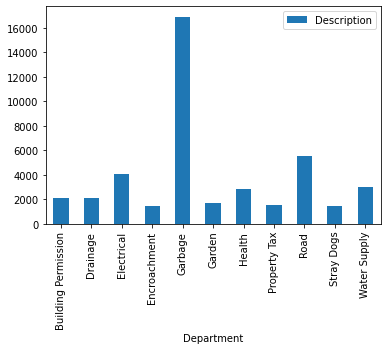

In [77]:
final_counts = final_df.groupby('Department').count()

final_counts.plot(kind='bar')

In [85]:
final_df.to_excel('../data/cleaned_v2.xlsx')